## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### 2. Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at random (MNAR) 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

## Examples

In [38]:
import seaborn as sns

In [39]:
df=sns.load_dataset('titanic')

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
## Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
## Delete the rows or data point to handle missing values

df.shape

(891, 15)

In [45]:
df.dropna().shape

(182, 15)

In [47]:
## Column wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values
### 1- Mean Value Imputation

<AxesSubplot: xlabel='age', ylabel='Count'>

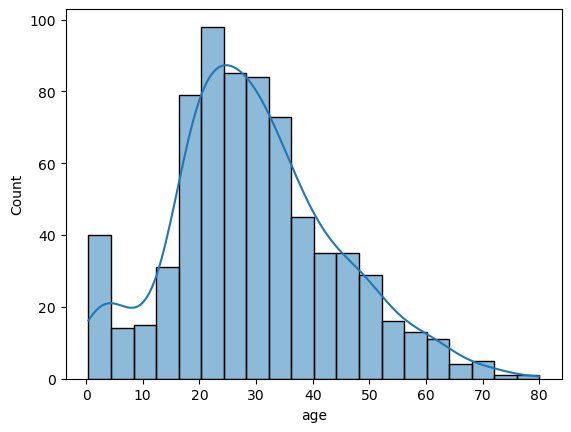

In [49]:
sns.histplot(df['age'],kde=True)

In [53]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [54]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [55]:
## MEan Imputation Works Well when we have normally distributed data

### 2. Median Value Imputation- If we have outliers in the dataset

In [56]:
df['age_median']=df['age'].fillna(df['age'].median())

In [58]:
df[['age_median','Age_mean','age']]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3. Mode Imputation Technqiue--Categorical values

In [59]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [60]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [67]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [68]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [69]:
df['embarked_mode'].isnull().sum()

0

In [70]:
df['embarked'].isnull().sum()

2

## Introduction to Handling Missing Values

Welcome back, everyone! In this video, we'll dive into **handling missing values**—a crucial part of feature engineering in any data science, machine learning, or deep learning project.

### Why is Handling Missing Values Important?

Whenever you're solving real-world data science problems, you'll often encounter messy, raw data that isn't ready for modeling. Missing values are one of the most common issues you'll face. Whether you're working on a data science project or deploying a machine learning model, dealing with missing values is an essential step.

Let’s explore why missing values occur, the types of missing data, and different techniques to handle them.

---

### Why Do Missing Values Occur?

Imagine you’ve distributed a survey form to a sample of people. If someone isn't comfortable answering certain questions, they might leave those fields empty. As a result, the dataset will have missing values. This is just one scenario, but in general, missing values occur when information for a specific variable is not captured.

### Mechanisms of Missing Data

There are three main mechanisms through which missing data can occur:

1. **Missing Completely at Random (MCAR)**:
   - The missing values are completely random and have no relationship with any other data.
   - Example: A survey participant accidentally skips a question due to a form error or data entry mistake.
   - In this case, missing values are randomly distributed, and there’s no systematic reason for their absence.

2. **Missing at Random (MAR)**:
   - The probability of a value being missing is related to the observed data but not the missing data itself.
   - Example: In a survey, men may be less likely to disclose their income, while women may be reluctant to disclose their age. Here, the missingness is dependent on another variable (like gender).
   - So, the missing data in one column may depend on data in another column.

3. **Missing Not at Random (MNAR)**:
   - The missing data is not random and depends on the value of the missing data itself or other unmeasured factors.
   - Example: Employees dissatisfied with their job may choose not to disclose their income. Thus, missingness is tied to their job satisfaction level.
   - Here, missing values are related to hidden factors that may not be directly measured in the dataset.

---

### Handling Missing Values: Techniques and Examples

Now that we understand why missing values occur, let's explore techniques to handle them. We’ll use Python to demonstrate these techniques with the popular **Titanic dataset**, which contains a lot of missing values.

In [1]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
print(df.head())
# df.columns.to_list()
# Checking for missing values
# print("\nMissing Values Count per Column:")
print(df.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

**Explanation**:  
Here, we use the Titanic dataset from Seaborn, which contains missing values in columns like `age`, `embarked`, and `deck`.

### Approach 1: Dropping Missing Values

#### **1. Dropping Rows with Missing Values**

In [2]:
# Dropping rows with any missing values
df_dropped_rows = df.dropna()
print("\nShape after dropping rows with missing values:", df_dropped_rows.shape)


Shape after dropping rows with missing values: (182, 15)


**Explanation**:  
If a column has a large number of missing values (e.g., `deck` with 688 missing entries out of 891), it might be reasonable to drop it. However, you shouldn’t drop columns with a few missing values like `age`, which is an important feature for analysis.

### Approach 2: Imputation Techniques

Instead of dropping data, let’s explore **imputation techniques** to fill in missing values:

#### **1. Mean Imputation**

This is useful for numerical columns, especially if the data is approximately normally distributed.

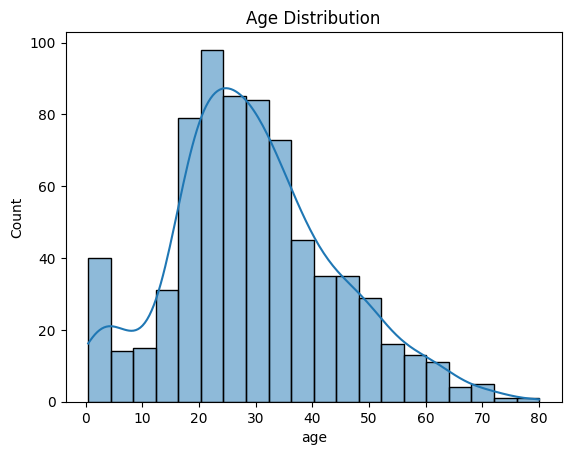


Missing values in 'age' column after mean imputation: 0


In [3]:
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Filling missing values in 'age' with the mean value
df['age'] = df['age'].fillna(df['age'].mean())
print("\nMissing values in 'age' column after mean imputation:", df['age'].isnull().sum())

**Explanation**:  
We replace missing values in the `age` column with the column’s mean. This is effective if the missing values are MCAR or MAR and the data is normally distributed.

#### **2. Median Imputation**

For skewed distributions, the **median** is more robust than the mean.

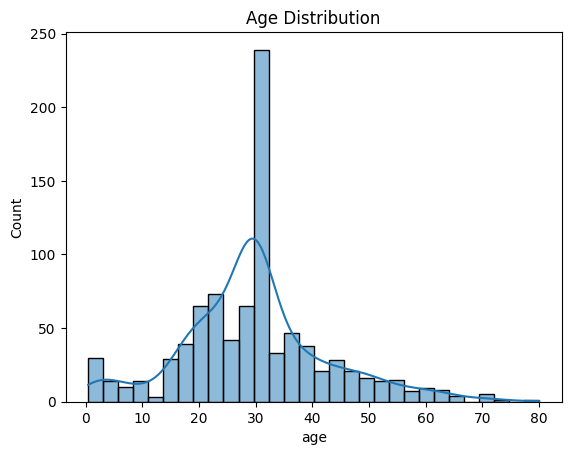

In [4]:
df['age'] = df['age'].fillna(df['age'].median())
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#### **3. Mode Imputation (for Categorical Columns)**


In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


#### **4. Forward Fill & Backward Fill**

These are useful for time-series dat

In [6]:
# Forward fill
df['age'] = df['age'].ffill()

# Backward fill
df['age'] = df['age'].bfill()
